# Flatmaps of final parcellation

In [2]:
import sys
sys.path.append("..")
import ProbabilisticParcellation.evaluate as ev
import ProbabilisticParcellation.util as ut
import ProbabilisticParcellation.export_atlas as ea
import ProbabilisticParcellation.scripts.atlas_paper.parcel_hierarchy as ph
import ProbabilisticParcellation.scripts.atlas_paper.evaluate_atlas as eva
from Functional_Fusion.dataset import *
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import torch as pt


# Plot parcellations based on single datasets

# Symmetric 68 map

In [3]:
figure_path = "/Users/jdiedrichsen/Dropbox (Diedrichsenlab)/papers/AtlasPaper/figure_parts/"
if not os.path.exists(figure_path):
    figure_path = "/Users/callithrix/Dropbox/AtlasPaper/figure_parts/"
atlas_dir = '/Volumes/diedrichsen_data$/data/Cerebellum/ProbabilisticParcellationModel/Atlases/'

In [4]:
T = pd.read_csv(ut.base_dir + '/dataset_description.tsv', sep='\t')

single_dataset_models = ['Models_03/sym_Md_space-MNISymC3_K-68_reordered',
                         'Models_03/sym_Po_space-MNISymC3_K-68_reordered',
                         'Models_03/sym_Ni_space-MNISymC3_K-68_reordered',
                         'Models_03/sym_Ib_space-MNISymC3_K-68_reordered',
                         'Models_03/sym_Wm_space-MNISymC3_K-68_reordered',
                         'Models_03/sym_De_space-MNISymC3_K-68_reordered',
                         'Models_03/sym_So_space-MNISymC3_K-68_reordered',
                         'Models_03/sym_Hc_space-MNISymC3_K-68_reordered']


# Settings
figsize = (8, 8)
_, cmap, labels = nt.read_lut(atlas_dir + 'NettekovenSym68.lut')

# Load the model and infos
infos = []
models = []
for m in single_dataset_models:
    inf, mod = ut.load_batch_best(
        m)
    infos.append(inf)
    models.append(mod)


In [19]:
suit_atlas, _ = am.get_atlas(inf.atlas, ut.base_dir + '/Atlases')
pseg = [model.arrange.marginal_prob().numpy() for model in models]
parcels = [np.argmax(p, axis=0).astype('float32') for p in pseg]
niftis = [suit_atlas.data_to_nifti(parcel) for parcel in parcels]
surf_data = [suit.flatmap.vol_to_surf(nifti, stats='mode',
                                     space='MNISymC', ignore_zeros=True) for nifti in niftis]


<Figure size 800x800 with 0 Axes>

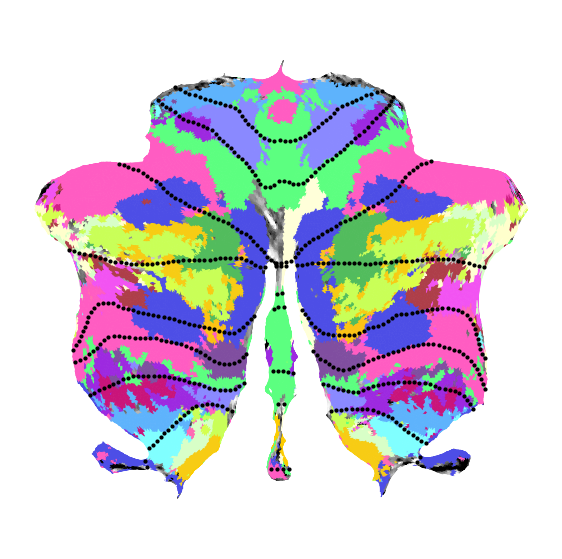

In [20]:
dataset = 'MDTB'

plt.figure(figsize=figsize)
ax = suit.flatmap.plot(surf_data[T[T.name == dataset].index[0]],
                       render='matplotlib',
                       cmap=cmap,
                       new_figure=True,
                       label_names=labels,
                       overlay_type='label',
                       colorbar=False,
                       bordersize=4)
plt.savefig(figure_path + f'Single_dataset_{dataset}.png',
            dpi=300, bbox_inches='tight')


<Figure size 800x800 with 0 Axes>

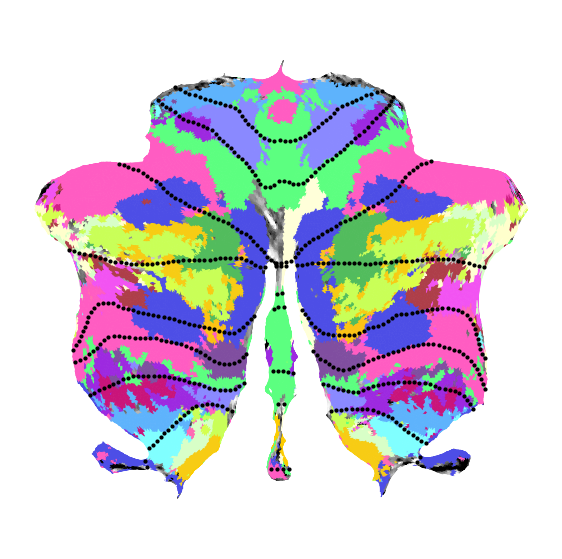

In [21]:
dataset = 'Pontine'

plt.figure(figsize=figsize)
ax = suit.flatmap.plot(surf_data[T[T.name == dataset].index[0]],
                       render='matplotlib',
                       cmap=cmap,
                       new_figure=True,
                       label_names=labels,
                       overlay_type='label',
                       colorbar=False,
                       bordersize=4)
plt.savefig(figure_path + f'Single_dataset_{dataset}.png',
            dpi=300, bbox_inches='tight')


<Figure size 800x800 with 0 Axes>

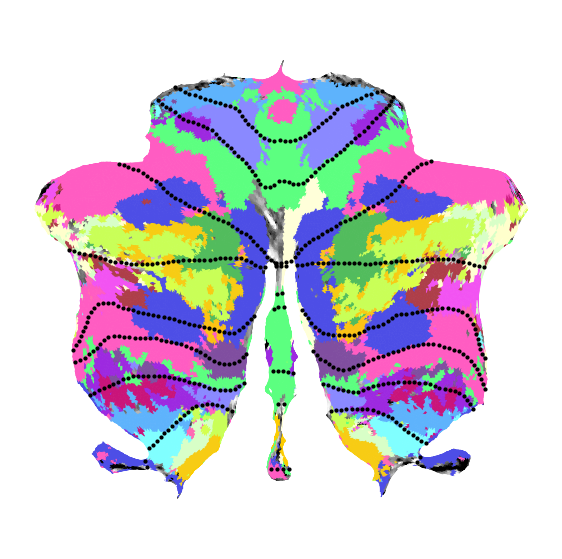

In [22]:
dataset = 'Nishimoto'

plt.figure(figsize=figsize)
ax = suit.flatmap.plot(surf_data[T[T.name == dataset].index[0]],
                       render='matplotlib',
                       cmap=cmap,
                       new_figure=True,
                       label_names=labels,
                       overlay_type='label',
                       colorbar=False,
                       bordersize=4)
plt.savefig(figure_path + f'Single_dataset_{dataset}.png',
            dpi=300, bbox_inches='tight')


<Figure size 800x800 with 0 Axes>

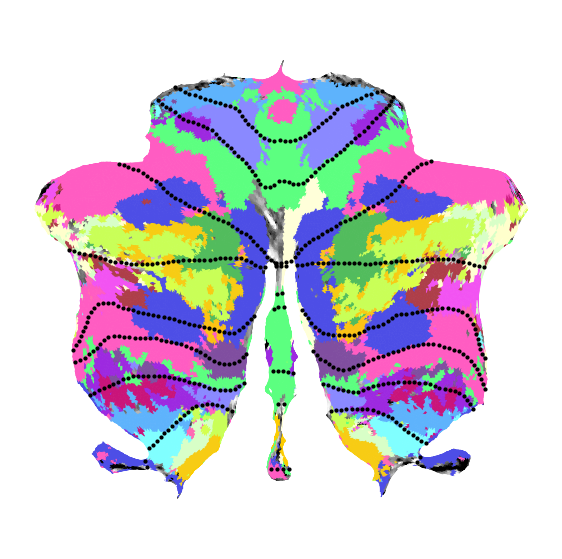

In [23]:
dataset = 'IBC'

plt.figure(figsize=figsize)
ax = suit.flatmap.plot(surf_data[T[T.name == dataset].index[0]],
                       render='matplotlib',
                       cmap=cmap,
                       new_figure=True,
                       label_names=labels,
                       overlay_type='label',
                       colorbar=False,
                       bordersize=4)
plt.savefig(figure_path + f'Single_dataset_{dataset}.png',
            dpi=300, bbox_inches='tight')
